In [98]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from time import time

In [99]:
#transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
size = 25
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                transforms.Resize(size),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [100]:
trainset = datasets.ImageFolder(r'images\train',transform=transform)
print(trainset)
testset = datasets.ImageFolder(r'images\test',transform=transform)
print(testset)

Dataset ImageFolder
    Number of datapoints: 75
    Root location: images\train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=25, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset ImageFolder
    Number of datapoints: 20
    Root location: images\test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=25, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [101]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=5,shuffle=True)  #เรียกรูปออกมาจาก dataset ได้ที่ละ 5 รูป
testloader = torch.utils.data.DataLoader(trainset, batch_size=5,shuffle=True) 

In [102]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [103]:
images, labels = dataiter.next() #ดึงข้อมูลอีกรอบ 
#images = images[:,0,:,:].reshape((-1,1,35,25))
#images = images.reshape((-1, 1,35,25))
print(images.shape)
print(labels.shape)

torch.Size([5, 1, 35, 25])
torch.Size([5])


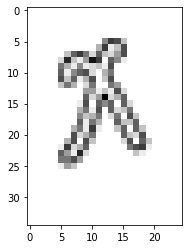

Answer:  2


In [104]:
plt.imshow(images[0].numpy().squeeze(), cmap = 'gray_r')
plt.show()
print('Answer: ',labels[0].numpy())

In [105]:
#Creat ANN Model
input_size = images.shape[2]*images.shape[3]
hidden_sizes = [128, 64]
output_size = 3

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(), 
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size), nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=875, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
  (5): LogSoftmax(dim=1)
)


In [106]:
# Train Model
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.99) # Stochatic Gradient Descent Algorithm
time0 = time()      
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #images = images[:,0,:,:].reshape((-1,1,35,25))
        X = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        #print(images.shape, X.shape)
        output = model(X)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch {} - Traning loss: {}'.format(e,running_loss/len(trainloader)))
print('\nTraining Time (in minutes) = ',(time()-time0)/60)

Epoch 0 - Traning loss: 1.1363340139389038
Epoch 1 - Traning loss: 1.1265358686447144
Epoch 2 - Traning loss: 1.1372898817062378
Epoch 3 - Traning loss: 1.1048632621765138
Epoch 4 - Traning loss: 1.1063185771306356
Epoch 5 - Traning loss: 1.1094216028849284
Epoch 6 - Traning loss: 1.1074911832809449
Epoch 7 - Traning loss: 1.115893308321635
Epoch 8 - Traning loss: 1.110059952735901
Epoch 9 - Traning loss: 1.1138671239217122
Epoch 10 - Traning loss: 1.1056599060694376
Epoch 11 - Traning loss: 1.1223998626073202
Epoch 12 - Traning loss: 1.1014919360478719
Epoch 13 - Traning loss: 1.1186673243840535
Epoch 14 - Traning loss: 1.122450876235962

Training Time (in minutes) =  0.0557832678159078


In [107]:
images, labels = next(iter(testloader)) 


torch.Size([1, 875])
tensor([[0.3498, 0.3305, 0.3197]])


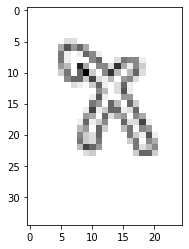

Answer:  2


In [108]:
X_test = images[0].view(1,-1)          # Flatten images to 784 Long vertor 
print(X_test.shape)

with torch.no_grad():
    y = model(X_test)                    # Predict answer from model = log(y)
    
print(torch.exp(y))

plt.imshow(images[0].numpy().squeeze(), cmap = 'gray_r')
plt.show()
print('Answer: ',labels[0].numpy())


15


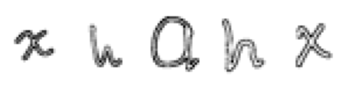

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


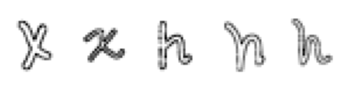

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


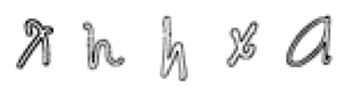

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


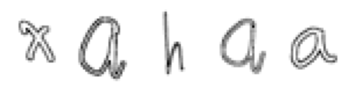

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


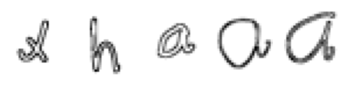

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


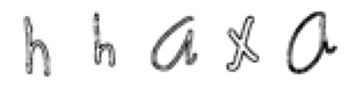

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


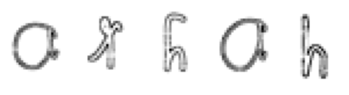

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


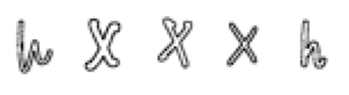

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


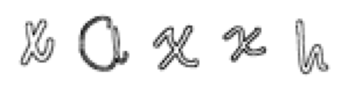

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


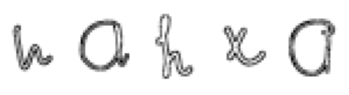

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


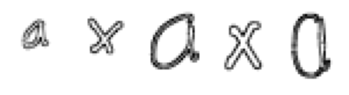

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


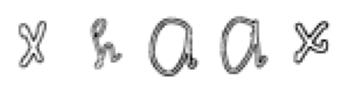

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


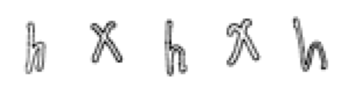

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


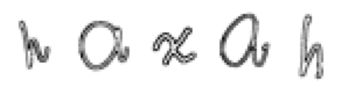

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0


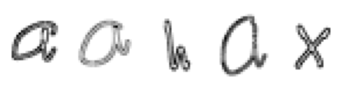

0 [0.34978688, 0.3304862, 0.31972694] 0
1 [0.34978688, 0.3304862, 0.31972694] 0
2 [0.34978688, 0.3304862, 0.31972694] 0
3 [0.34978688, 0.3304862, 0.31972694] 0
4 [0.34978688, 0.3304862, 0.31972694] 0
Nuber of Image Tested =  75

Model Accuracy =  0.3333333333333333


In [112]:
corret_count = 0
all_count = 0
cond = True
print(len(testloader))
for images, labels in testloader:
    if cond:
        m = images.shape[0]
        for i in range(m):
            plt.subplot(1,m,i+1)
            plt.axis('off')
            plt.imshow(images[i].numpy().squeeze(), cmap = 'gray_r')
        #cond = False
        plt.show()
    for i in range(len(labels)):
        X = images[i].view(1,875)        
        with torch.no_grad():
            log_y = model(X)
            
        y = torch.exp(log_y)
        prob = list(y.numpy()[0])
        pred_output = prob.index(max(prob))
        
        answer = labels.numpy()[i]
        print(i, prob, pred_output)
        if (answer == pred_output):
            corret_count += 1 
        all_count +=1

print('Nuber of Image Tested = ', all_count)
print('\nModel Accuracy = ', corret_count/all_count)